## **CONFIGURAÇÕES**

In [61]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/labeled_data.csv


In [64]:
!pip install pytorch-nlp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets

## **PROCESSING DATA**

In [ ]:
df = pd.read_csv('/kaggle/input/labeled_data.csv')
df


- hate speech it is labelled as 0
- offensive it is labelled as 1
- neither then it is class 2

We will drop all the columns and keep only the last two columns

In [105]:
sub_df = df[['class', 'tweet']]
sub_df
print(sub_df['tweet'].iloc[0],"\n")
print(sub_df['tweet'].iloc[1],"\n")
print(sub_df['tweet'].iloc[2],"\n")
print(sub_df['tweet'].iloc[3],"\n")
print(sub_df['tweet'].iloc[4],"\n")

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 



In [106]:
import re 

In [107]:
i = 0
for i, words in zip(range(len(sub_df['tweet'])), sub_df['tweet']):
  tweet = words.lower()
  tweet = re.sub(r'\@w+|\#','', tweet)
  tweet = re.sub(r'[^\w\s]','',tweet)
  sub_df['tweet'][i] = tweet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
sub_df = sub_df.drop_duplicates('tweet')

In [109]:
def tokenizationAndStopWords(tweet):
  tweet_tokens = word_tokenize(tweet)
  filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
  return " ".join(filtered_tweets)

In [110]:
sub_df.tweet = sub_df['tweet'].apply(tokenizationAndStopWords)

In [111]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [112]:
nltk.download('wordnet')
nltk.download('omw-1.4')
sub_df['tweet'] = sub_df['tweet'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [113]:
print(sub_df['tweet'].iloc[0],"\n")
print(sub_df['tweet'].iloc[1],"\n")
print(sub_df['tweet'].iloc[2],"\n")
print(sub_df['tweet'].iloc[3],"\n")
print(sub_df['tweet'].iloc[4],"\n")

rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 

rt mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place 

rt urkindofbrand dawg rt 80sbaby4life ever fuck bitch start cry confused shit 

rt c_g_anderson viva_based look like tranny 

rt shenikaroberts shit hear might true might faker bitch told ya 57361 



## **DATA VISUALIZATION**

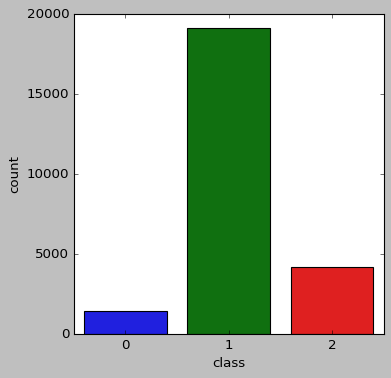

In [138]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='class', data = sub_df)

In [139]:
non_hate_tweets = sub_df[sub_df['class'] == 2]
non_hate_tweets.head()

,class,tweet
0,2,rt mayasolovely woman shouldnt complain cleani...
40,2,momma said pussy cats inside doghouse
63,2,addicted2guys simplyaddictedtoguys httptco1jl4...
66,2,allaboutmanfeet httptco3gzupfumev woof woof ho...
67,2,allyhaaaaa lemmie eat oreo amp dishes one oreo...


In [140]:
neg_tweets = sub_df[sub_df['class'] == 1]
neg_tweets.head()

,class,tweet
1,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,1,rt c_g_anderson viva_based look like tranny
4,1,rt shenikaroberts shit hear might true might f...
5,1,t_madison_x shit blows meclaim faithful somebo...


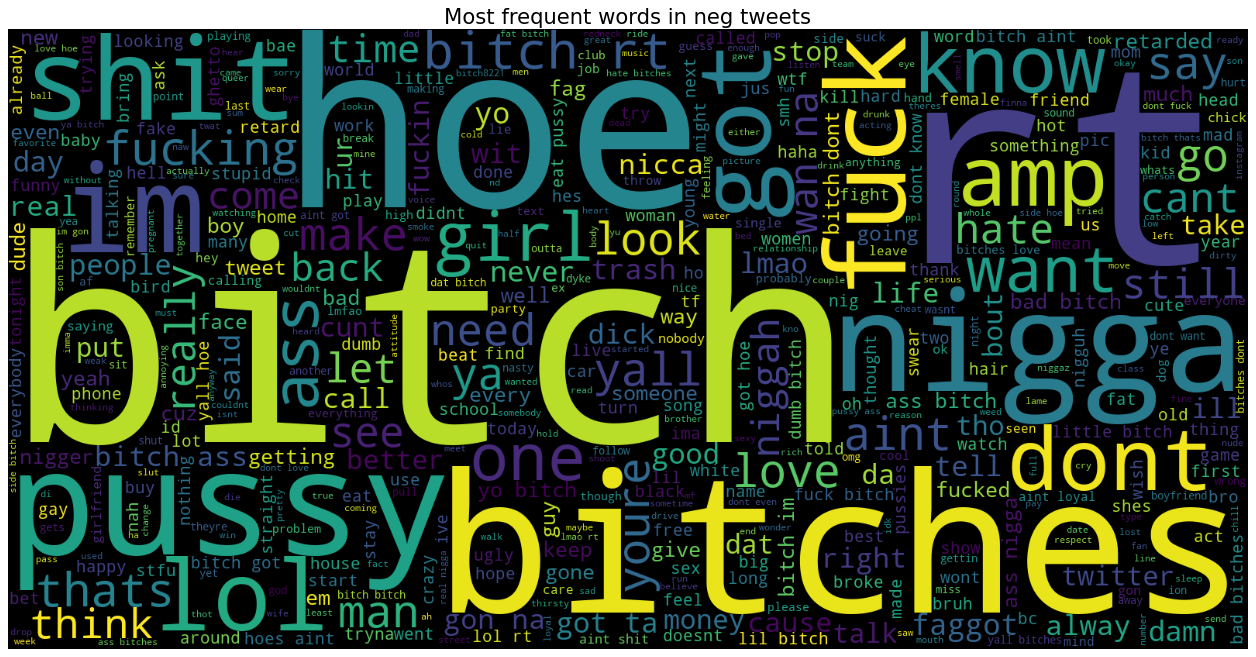

In [141]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neg tweets', fontsize = 19)
plt.show()

In [142]:
hate_tweets = sub_df[sub_df['class'] == 0]
hate_tweets.head()

,class,tweet
85,0,blackman38tide halelookyhere howdydowdy11 quee...
89,0,cb_baby24 hite_thunduh alsarabsss hes beaner s...
110,0,devilgrimz vigxrarts youre fucking gay blackli...
184,0,markroundtreejr lmfaoooo hate black people htt...
202,0,nochillpaz least im nigger httptcorgja7cfoit l...


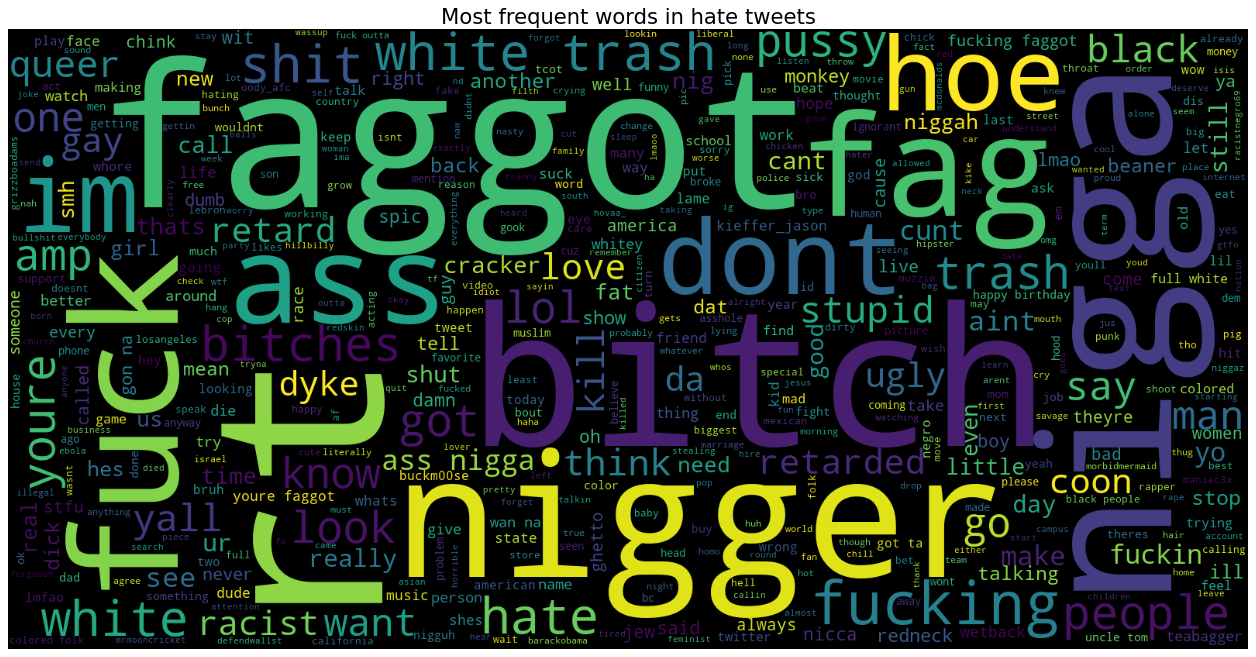

In [143]:
text = ' '.join([word for word in hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [144]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(sub_df['tweet'])
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features: 355863

First 20 features: 
['007', '007 httptcoon5t60rmfb', '007beardownjedi', '007beardownjedi afl', '007beardownjedi afl american', '007hertzrumble', '007hertzrumble httptcoqyn1bc7mxs', '007hertzrumble httptcoqyn1bc7mxs via', '007m_h', '007m_h lilduval', '007m_h lilduval damn', '00_jackie', '00_jackie darknight420', '00_jackie darknight420 allahthefairy', '00_jackie wan', '00_jackie wan na', '00sexilexi00', '00sexilexi00 bitch', '00sexilexi00 bitch ass', '00sexilexi00 freeze']


## **MODEL**

In [130]:
X = sub_df['tweet']
Y = sub_df['class']
X = vect.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19794, 355863), (4949, 355863), (19794,), (4949,))

In [131]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 84.40%


In [132]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[  11  269    8]
 [   9 3764   35]
 [   0  451  402]]


              precision    recall  f1-score   support

           0       0.55      0.04      0.07       288
           1       0.84      0.99      0.91      3808
           2       0.90      0.47      0.62       853

    accuracy                           0.84      4949
   macro avg       0.76      0.50      0.53      4949
weighted avg       0.83      0.84      0.81      4949



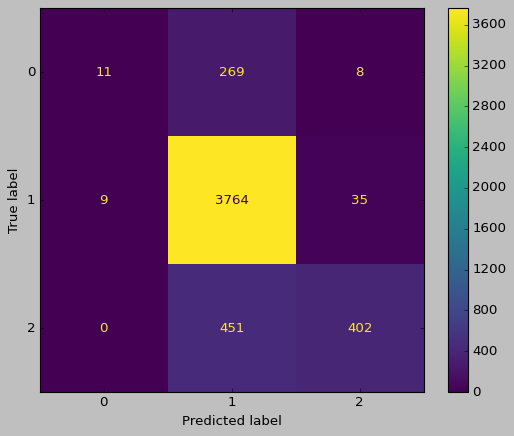

In [133]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()